## Task 1: Credit Scoring Model 

This project focuses on building machine learning models to predict whether an individual is creditworthy using structured financial and demographic data. We apply Logistic Regression and Random Forest classifiers, evaluate their performance, and compare the results.

Dataset: German Credit Data (UCI ML Repository)  
Models Used: Logistic Regression, Random Forest  
Objective: Binary classification (0 = Good Credit, 1 = Bad Credit)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

In [2]:
# Load the numeric version of the German Credit dataset
df = pd.read_csv("german.data-numeric", sep='\s+', header=None)

# Adding column names
df.columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'SavingsAccount', 'EmploymentSince', 'InstallmentRate', 'PersonalStatus',
    'OtherDebtors', 'PresentResidenceSince', 'Property', 'Age',
    'OtherInstallmentPlans', 'Housing', 'NumberCredits', 'Job',
    'LiablePeople', 'Telephone', 'ForeignWorker',
    'Missing1', 'Missing2', 'Missing3', 'Missing4', 'Target'
]

# Drop irrelevant columns
df.drop(columns=['Missing1', 'Missing2', 'Missing3', 'Missing4'], inplace=True)

print("Shape:", df.shape)
df.head()

Shape: (1000, 21)


,Status,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,EmploymentSince,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,LiablePeople,Telephone,ForeignWorker,Target
0,1,6,4,12,5,5,3,4,1,67,...,2,1,2,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,1,1,1,0,0,1,0,0,2
2,4,12,4,21,1,4,3,3,1,49,...,1,2,1,1,0,0,1,0,0,1
3,1,42,2,79,1,4,3,4,2,45,...,1,2,1,1,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,2,2,1,1,1,0,1,0,0,2


In [3]:
# Recode: 1 = Good (0), 2 = Bad (1)
df['Target'] = df['Target'].map({1: 0, 2: 1})

# Check class balance
df['Target'].value_counts()

0    700
1    300
Name: Target, dtype: int64

In [4]:
# Split features and labels
X = df.drop('Target', axis=1)
y = df['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression Accuracy: 0.77
Precision: 0.6667
Recall: 0.4667
F1 Score: 0.549
AUC: 0.6833


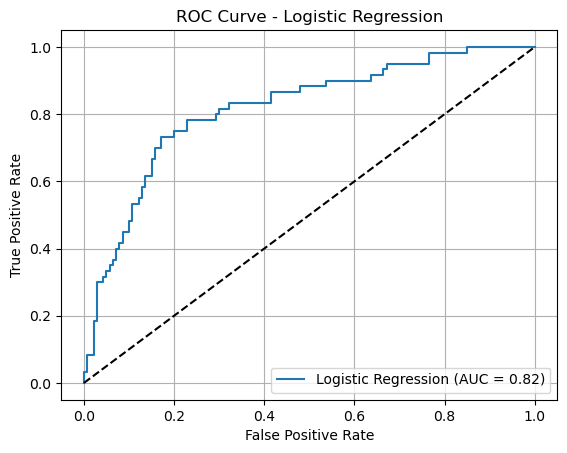

In [5]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation metrics
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print("Precision:", round(precision_score(y_test, y_pred_log), 4))
print("Recall:", round(recall_score(y_test, y_pred_log), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_log), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred_log), 4))

# 📈 ROC Curve for Logistic Regression
y_scores_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()

Random Forest Accuracy: 0.775
Precision: 0.6923
Recall: 0.45
F1 Score: 0.5455
AUC: 0.6821


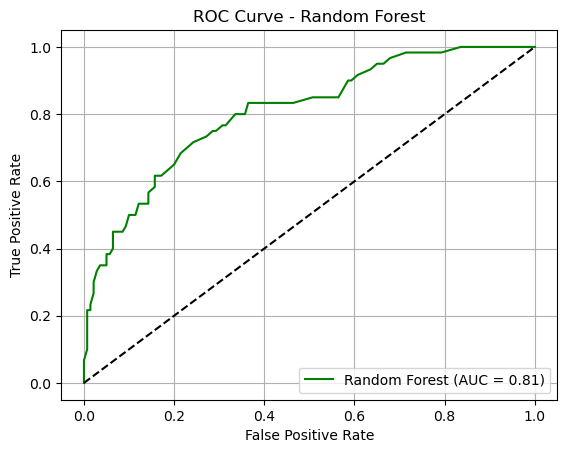

In [6]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred_rf), 4))

# 📈 ROC Curve for Random Forest
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf, color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()

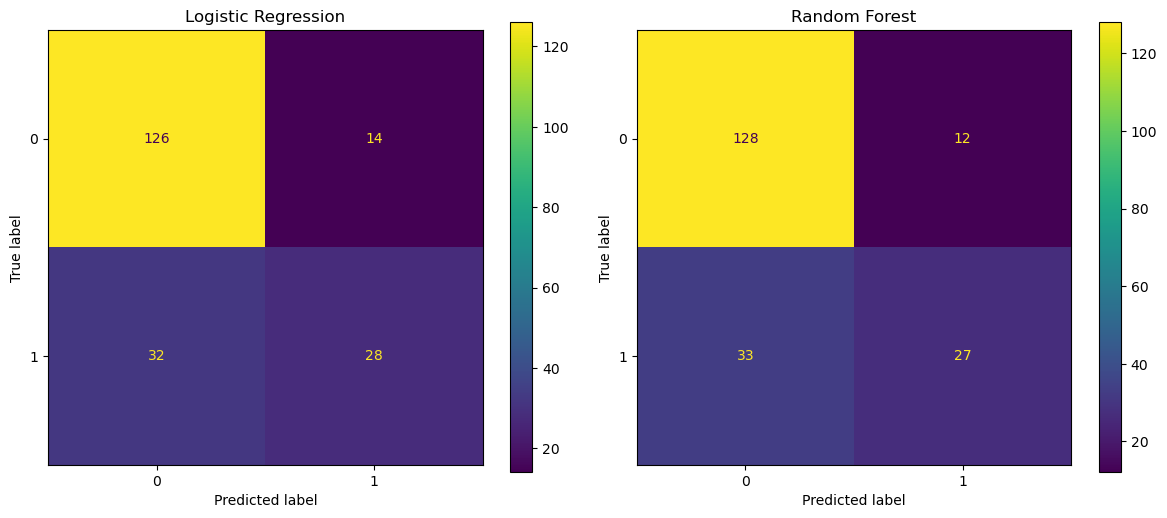

In [7]:
# Confusion Matrices (Side-by-Side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

In [8]:
# Final Model Comparison Table
comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Logistic Regression': [0.770, 0.6667, 0.4667, 0.549, 0.6833],
    'Random Forest': [0.775, 0.6923, 0.450, 0.5455, 0.6821]
}

comparison_df = pd.DataFrame(comparison)
comparison_df

,Metric,Logistic Regression,Random Forest
0,Accuracy,0.7700,0.7750
1,Precision,0.6667,0.6923
2,Recall,0.4667,0.4500
3,F1 Score,0.5490,0.5455
4,AUC,0.6833,0.6821


## Final Conclusion

Both Logistic Regression and Random Forest performed similarly on the credit scoring classification task.

Random Forest gave slightly better accuracy and precision.
Logistic Regression had slightly better recall and AUC, which could be useful in scenarios where identifying risky customers is more important than false positives.

In real-world applications, model choice may depend on business priorities:
Choose Random Forest for robust, general performance
Choose Logistic Regression for transparency and interpretability

This project demonstrates how evaluating multiple models helps find the best fit for a classification task.